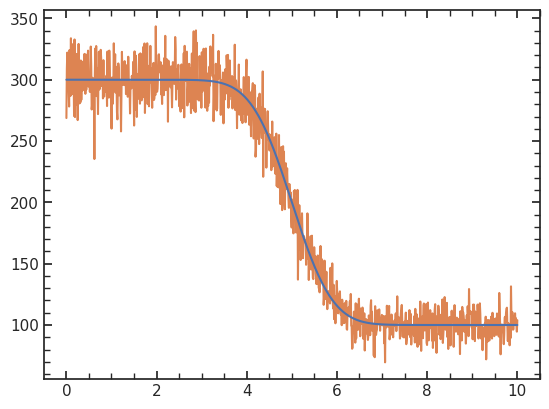

In [1]:
from scipy.special import erfc
from scipy.stats import norm

def fit_function(x, mu, sigma, rate, bkg):
    y = rate*erfc((x-mu)/sigma) + bkg
    return y

def fit_function2(x, mu, sigma, rate, bkg):
    y = rate * norm.pdf(x, mu, sigma) + bkg
    return y

param_names = ['mu', 'sigma', 'rate', 'bkg']

def chi2(x, mu):
    return ((x-mu)**2/mu).sum()

x = np.linspace(0, 10, 1000)
theta0 = 5, 1, 100, 100
y = fit_function(x, *theta0)
y_exp = y + np.random.normal(0, np.sqrt(y))
plt.plot(x, y, zorder = 1)
plt.plot(x, y_exp, zorder = -1)

In [2]:
import iminuit

def cost_function(theta):
    mu, sigma, rate, bkg = theta
    y = fit_function(x, mu, sigma, rate, bkg)
    return chi2(y_exp, y)

m = iminuit.Minuit(cost_function, theta0)
m.errordef = m.LEAST_SQUARES
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 979.1                      │              Nfcn = 89               │
│ EDM = 3.33e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   4.988   │   0.013   │            │            │         │         │       │
│ 1 │ x1   │   1.033   │   0.024   │            │            │         │         │       │
│ 2 │ x2   │   99.9    │    0.5    │            │            │         │         │       │
│ 3 │ x3   │   100.6   │    0.5    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        x0        x1        x2        x3 │
├────┼─────────────────────────────────────────┤
│ x0 │  0.000175 -7.96e-05  -0.00182  -0.00169 │
│ x1 │ -7.96e-05  0.000573   0.00552  -0.00392 │
│ x2 │  -0.00182   0.00552     0.293    -0.157 │
│ x3 │  -0.00169  -0.00392    -0.157      0.29 │
└────┴─────────────────────────────────────────┘

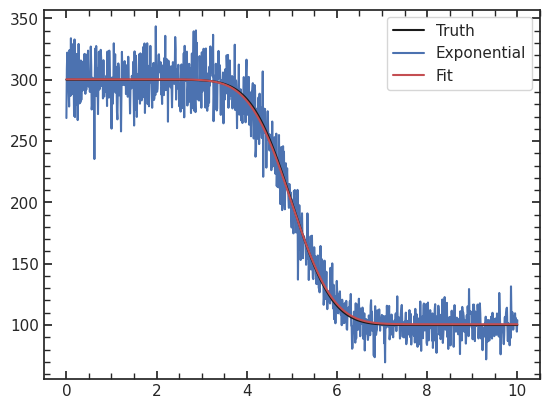

In [3]:
y_fit = fit_function(x, *m.values)
plt.plot(x, y, 'k', zorder = 0, label = 'Truth')
plt.plot(x, y_exp, 'b', zorder = -1, label = 'Exponential')
plt.plot(x, y_fit, 'r', zorder = 2, label = 'Fit')
plt.legend()

In [9]:
data = pd.read_csv('Co60.csv')

x_data = data['bins'].to_numpy()
y_data = - data['srs_values'].to_numpy() + data['bkg_values'].to_numpy()

mask = y_data>0.
x_data = x_data[mask]
y_data = y_data[mask]

Text(0.5, 0.98, '$^{60}$Co')

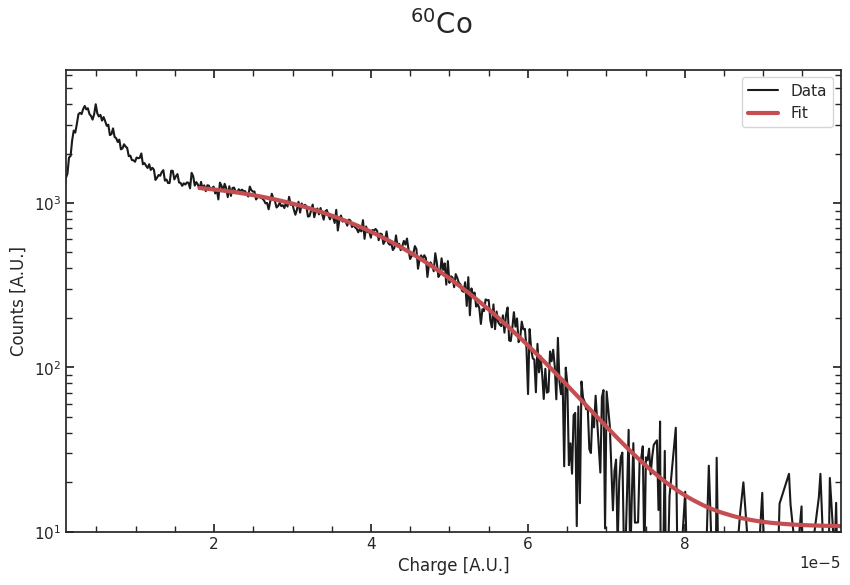

In [10]:
fig, ax = plt.subplots(figsize = (10,6))

x_min = 1.8e-5
x_max = 1e-4

# x_min = x_data[np.argmax(y_data)]
# x_max = max(x_data)

mask_fit = np.logical_and(x_data>=x_min, x_data<=x_max)

def cost_function(theta):
    mu, sigma, rate, bkg = theta
    mask_fit = np.logical_and(x_data>=x_min, x_data<=x_max)
    y = fit_function(x_data, mu, sigma, rate, bkg)
    return chi2(y_data[mask_fit], y[mask_fit])

theta0 = 1e-5, 1e-5, 5e-2, 10

m = iminuit.Minuit(cost_function, theta0, name = param_names)
m.errordef = m.LEAST_SQUARES
m.limits['mu'] = (0, None)
m.limits['sigma'] = (0, None)
m.limits['rate'] = (0, None)
m.limits['bkg'] = (0, None)
m.migrad()

ax.plot(x_data, y_data, 'k-', label = 'Data')

y_fit = fit_function(x_data, *m.values)
#y_fit = fit_function2(x_data, *theta0)
#plt.plot(x_data, y_data, 'k', zorder = 0, label = 'Truth')
ax.plot(x_data[mask_fit], y_fit[mask_fit], 'r', zorder = 2, label = 'Fit', lw = 3)
ax.set_yscale('log')
ax.legend()
ax.set_xlim(x_data.min()+1e-6, x_data.max())
ax.set_ylim(bottom = 1e1)
ax.set_xlabel('Charge [A.U.]')
ax.set_ylabel('Counts [A.U.]')
fig.suptitle(r'$^{60}$Co', fontsize = 20)

In [11]:
m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1924                       │              Nfcn = 566              │
│ EDM = 3.27e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │ 39.81e-6  │  0.22e-6  │            │            │    0    │         │       │
│ 1 │ sigma │ 21.73e-6  │  0.20e-6  │            │            │    0    │         │       │
│ 2 │ rate  │    664    │     6     │            │            │    0    │         │       │
│ 3 │ bkg   │   10.7    │    0.5    │            │            │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │        mu     sigma      rate       bkg │
├───────┼─────────────────────────────────────────┤
│    mu │   4.8e-14 -3.98e-14 -1.24e-06  2.63e-08 │
│ sigma │ -3.98e-14  4.15e-14  1.04e-06 -4.43e-08 │
│  rate │ -1.24e-06  1.04e-06      35.5    -0.915 │
│   bkg │  2.63e-08 -4.43e-08    -0.915     0.238 │
└───────┴─────────────────────────────────────────┘

In [ ]:
Co60 = {'mu': 2.651688128904985e-06,
 'sigma': 1.8047035713239208e-06,
 'rate': 0.050406088497316905,
 'bkg': 24.848568970944907,
 'exp' : 1118,
 'label' : r'$^{60}$Co'}

Na22 = {'mu': 2.3353767649984423e-06,
 'sigma': 1.4333517490386534e-06,
 'rate': 0.0462022694995178,
 'bkg': 4195.482953671155,
 'exp' : 1062,
 'label' : r'$^{22}$Na'}

Cs137 = {'mu': 1.5583072387489018e-06,
 'sigma': 1.2974454731396433e-06,
 'rate': 0.03434668722072319,
 'bkg': 2074.591374758374,
 'exp' : 477,
 'label' : r'$^{137}$Cs'}

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

for el in [Co60, Cs137, Na22]:
    ax.scatter(el['exp'], el['mu'], marker = 'o', label = el['label'])

ax.set_xlim(left = 0)
ax.set_ylim(bottom = 0)
ax.legend()